<font color='darkorange'>**This week, the output of cells under "Exercise Output" must be visible.**</font>

---

# Exercise

For these exercises, add your functions to the *apputil\.py* file. If you like, you're welcome to adjust the *app\.py* file, but it is not required.

## Exercise 1

Use Scikit-Learn and NumPy to write a function `kmeans(X, k)` that does the following:

- performs k-means clustering on a numerical NumPy array `X`
- returns a **tuple** `(centroids, labels)`, where
    - `centroids` is a 2D array of shape `(k, n_features)` containing the cluster centroids, and 
    - `labels` is a 1D array of shape `(n_samples,)` containing the index of the assigned cluster for each row of `X`.

In [4]:
import numpy as np
from sklearn.cluster import KMeans

In [5]:
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

centroids, labels = kmeans(X, k=3)

# centroids[1] --> the centroid for the second cluster
# labels[2] --> the cluster assignment for the third data point

In [6]:
import numpy as np
from sklearn.cluster import KMeans

def kmeans(X, k):
    # Initialize KMeans with k clusters
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    
    # Fit the model to the data
    km.fit(X)
    
    centroids = km.cluster_centers_
    labels = km.labels_
    
    return centroids, labels


In [7]:
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

centroids, labels = kmeans(X, k=3)
print("Centroids:\n", centroids)
print("Labels:", labels)


Centroids:
 [[4. 5. 6.]
 [7. 8. 9.]
 [1. 2. 3.]]
Labels: [2 0 1]


## Exercise 2

1. Somewhere in your *apputil\.py* file, [load](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) the `diamonds` dataset from the `seaborn` library.
2. Identify **just the numerical columns**, and save these (seven) columns in a dataframe as a global variable.
3. Write a function called `kmeans_diamonds(n, k)` that runs your `kmeans` function (from Exercise 1) to create `k` clusters on the first `n` rows of the (numeric) diamonds dataset.


In [10]:
from apputil import kmeans_diamonds
from apputil import kmeans

In [11]:
centroids, labels = kmeans_diamonds(n=1000, k=5)

# centroids[3] --> the centroid for the fourth cluster
# labels[9] --> the cluster assignment for the tenth diamond

In [13]:
from apputil import kmeans_diamonds
from apputil import kmeans   

centroids, labels = kmeans_diamonds(n=1000, k=5)

print("Centroids shape:", centroids.shape)
print("Labels shape:", labels.shape)
print("First 10 labels:", labels[:10])


Centroids shape: (5, 7)
Labels shape: (1000,)
First 10 labels: [2 2 2 2 2 2 2 2 2 2]


## Exercise 3

Write a function called `kmeans_timer(n, k, n_iter=5)` that does the following:

- runs the function `kmeans_diamonds(n, k)` exactly `n_iter` times, and saves the runtime for each run.
- returns the *average* time across the `n` runs, where "time" is in seconds.

As a starting point, consider the following snippet:

In [4]:
from time import time

def my_func(x):
    return x + 1

start = time()  # capture the time
_ = my_func(1)  # ... do something
t = time() - start  # calculate the runtime

In [5]:
from apputil import kmeans_timer

avg_time = kmeans_timer(n=1000, k=5, n_iter=5)
print("Average runtime over 5 runs:", round(avg_time, 4), "seconds")


Average runtime over 5 runs: 0.0021 seconds


## Exercise Output

<font color='darkorange'>The output of the following cells must be visible.</font>

Run the following cells, and consider the time complexity for k-Means clustering with respect to the number of samples `n` and the number of clusters `k`.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

from apputil import *

%config InlineBackend.figure_formats = ['svg']
sns.set_theme(style="whitegrid")

In [7]:
# this might take a minute or so ...
n_values = np.arange(100, 50000, 1000)
k5_times = [kmeans_timer(n, 5, 20) for n in n_values]

In [8]:
# this should be slightly faster
k_values = np.arange(2, 50)
n10k_times = [kmeans_timer(10000, k, 10) for k in k_values]

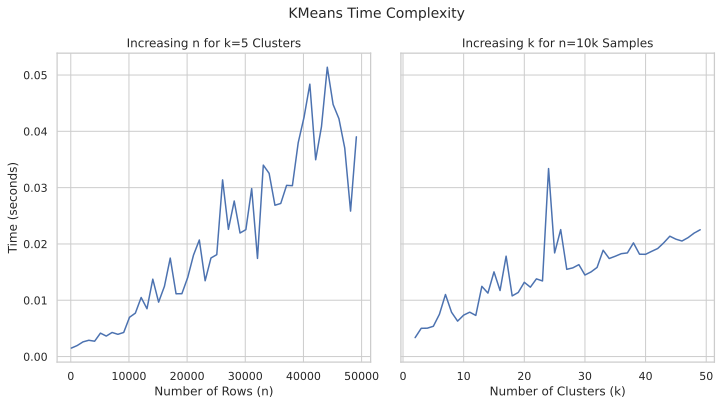

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.tight_layout()
fig.suptitle("KMeans Time Complexity", y=1.08, fontsize=14)

sns.lineplot(x=n_values, y=k5_times, ax=axes[0])
axes[0].set_xlabel("Number of Rows (n)")
axes[0].set_ylabel("Time (seconds)")
axes[0].set_title('Increasing n for k=5 Clusters')

sns.lineplot(x=k_values, y=n10k_times, ax=axes[1])
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_title('Increasing k for n=10k Samples');

## Bonus

Consider the following algorithm.

- Modify the code to *count* the number of computational steps taken, saved in a global variable `step_count`.
- Illustrate how this metric changes as $n\to\infty$ (consider the "worst case scenario").
- Estimate the time complexity of this algorithm using $O$-notation, and show it in a plot.
    - Refer to Chapter 11 in the Guttag book for more on asymptotic $O$-notation.

*Note: in this exercise, we are counting *steps*, not time.*

In [10]:
def bin_search(n):
    arr = np.arange(n)
    left = 0
    right = n-1

    x = n-1

    while left <= right:
        middle = left + (right - left) // 2

        # check if x is present at mid
        if (arr[middle] == x):
            return middle

        # if x greater, ignore left half
        if (arr[middle] < x):
            left = middle + 1

        # if x is smaller, ignore right half
        else:
            right = middle - 1

    # if we reach here, then element was not present
    return -1

In [11]:
import numpy as np

# global variable to track number of steps
step_count = 0

def bin_search(n):
    global step_count
    step_count = 0  # reset step count each run

    arr = np.arange(n)
    left = 0
    right = n - 1
    x = n - 1  # search for the last element (worst case)

    while left <= right:
        step_count += 1  # count the step for comparison
        middle = left + (right - left) // 2

        step_count += 1  # count checking equality
        if arr[middle] == x:
            return middle

        step_count += 1  # count comparison
        if arr[middle] < x:
            left = middle + 1
        else:
            right = middle - 1

    return -1


In [12]:
n_values = np.arange(10, 10000, 100)
steps = []

for n in n_values:
    _ = bin_search(n)
    steps.append(step_count)


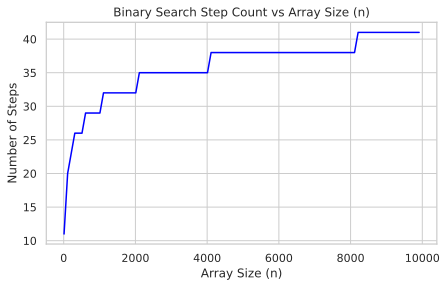

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(7, 4))
plt.plot(n_values, steps, marker='', color='blue')
plt.title("Binary Search Step Count vs Array Size (n)")
plt.xlabel("Array Size (n)")
plt.ylabel("Number of Steps")
plt.show()
